In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('Car_sales.csv')

In [4]:
dataset1=dataset.replace(to_replace =["Car","Passenger"],
value =["0","1"])


In [5]:
dataset1

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,1,26.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,1,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,1,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,1,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,1,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23,4/26/2011,101.623357


In [6]:
X = dataset1.iloc[:, [13, 2]].values
y = dataset1.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred = classifier.predict(X_test)

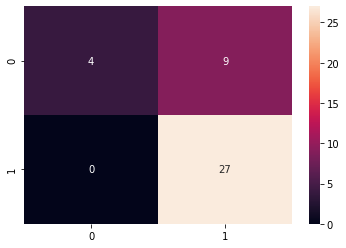

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


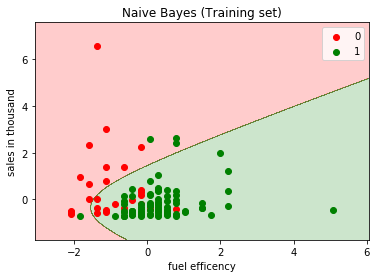

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('fuel efficency')
plt.ylabel('sales in thousand')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


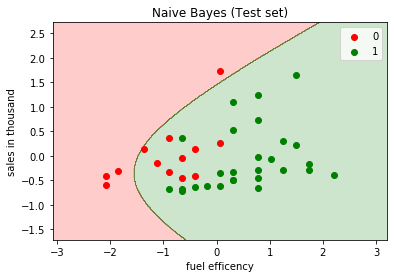

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('fuel efficency')
plt.ylabel('sales in thousand')
plt.legend()
plt.show()

In [14]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

dataset1 = dataframe = pandas.read_csv("Car_sales.csv")
X = dataset1.iloc[:, [13, 2]].values
Y = dataset1.iloc[:, 4].values
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())


[1.         1.         0.8125     0.75       0.9375     0.875
 0.9375     0.8        0.8        0.86666667]
0.8779166666666667
0.08356322456679134


/home/rajan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


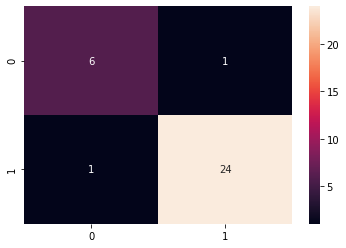

In [15]:
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
sns.heatmap(matrix, annot=True, fmt="d")

In [16]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print(report)


              precision    recall  f1-score   support

         Car       0.86      0.86      0.86         7
   Passenger       0.96      0.96      0.96        25

    accuracy                           0.94        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.94      0.94      0.94        32

